In [169]:
# 準備
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from matplotlib import pyplot as plt
from matplotlib.font_manager import FontProperties as fp
import matplotlib.dates as mdates

# matplotlib用ラベル日本語化設定
JP = fp(fname=r"C:\WINDOWS\Fonts\BIZ-UDGothicR.ttc", size=14)
JPFONT = {'family': 'BIZ UDGothic'}


In [127]:
# 【準備】気象庁より気象データをダウンロードしたものを使用（2020年分；横浜）
df_org = pd.read_csv("./data.csv", encoding="SHIFT-JIS")
df_org['Date'] = pd.to_datetime(df_org['年月日'])
df = df_org.rename(columns={'平均気温(℃)': 'Temp'})
df.head()


,年月日,Temp,品質情報,均質番号,Date
0,2020/1/1,6.6,8,1,2020-01-01
1,2020/1/2,7.1,8,1,2020-01-02
2,2020/1/3,7.1,8,1,2020-01-03
3,2020/1/4,8.1,8,1,2020-01-04
4,2020/1/5,6.5,8,1,2020-01-05


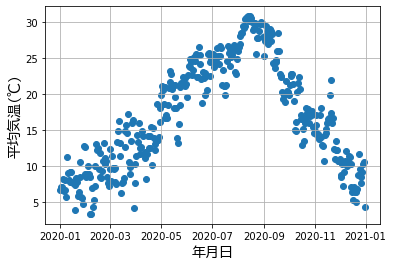

In [164]:
# 【確認】読み込んだデータを散布図として表示する
fig, ax = plt.subplots()
ax.scatter(df.Date, df.Temp)
ax.set_xlabel("年月日", fontproperties=JP)
ax.set_ylabel("平均気温(℃)", fontproperties=JP)
ax.grid(True) 
plt.show()


多項式次数: 1
係数: [ 0.02171371 13.04353122]
最小二乗スコア: 0.09689904105466995


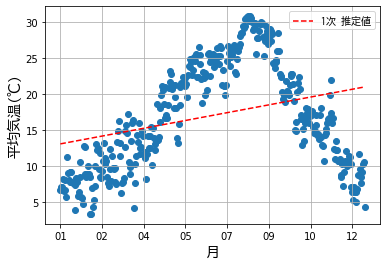

多項式次数: 2
係数: [-0.00058739  0.23611272  0.03665797]
最小二乗スコア: 0.7301399849413339


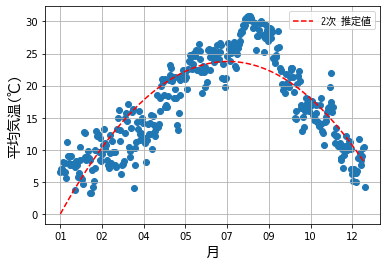

多項式次数: 5
係数: [ 1.12235695e-10 -8.65427126e-08  1.91496002e-05 -1.05504432e-03
  5.46200219e-02  7.14211594e+00]
最小二乗スコア: 0.8746518568959334


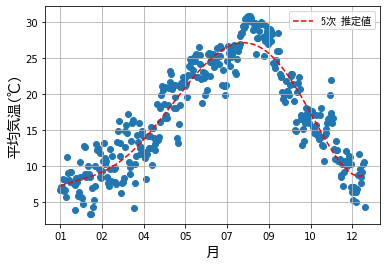

多項式次数: 10
係数: [ 1.44132759e-20 -2.61393926e-17  2.01496600e-14 -8.60665079e-12
  2.22642783e-09 -3.58007411e-07  3.53050212e-05 -2.02628601e-03
  6.12220116e-02 -7.46882990e-01  9.53369798e+00]
最小二乗スコア: 0.8881881786804049


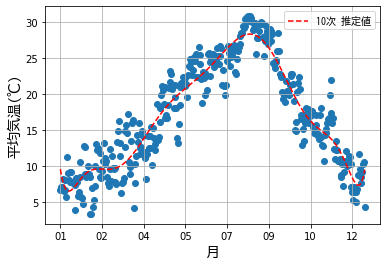

多項式次数: 18
係数: [-1.18540337e-37  3.19077688e-34 -3.72529289e-31  2.40361506e-28
 -8.60828553e-26  1.00272553e-23  6.05522684e-21 -3.82349128e-18
  1.15443294e-15 -2.26353815e-13  3.08760244e-11 -2.97618785e-09
  2.00511392e-07 -9.10341274e-06  2.57953156e-04 -3.84249798e-03
  1.60017670e-02  1.67158886e-01  6.75664500e+00]
最小二乗スコア: 0.9048182598864194


C:\Users\tamag\AppData\Local\Temp/ipykernel_2480/2803500672.py:34: RankWarning: Polyfit may be poorly conditioned
  main(j)


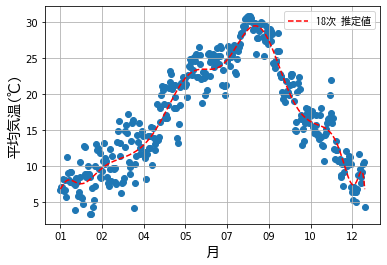

In [222]:
# モデル作成
y = df.Temp.values
x = np.arange(len(y))


def main(j: int) -> None:
    print(f"多項式次数: {j}")

    # パラメータ推定（j次関数）
    fit = np.polyfit(x, y, j)
    print(f"係数: {fit}")

    # 予測値
    y2 = np.poly1d(fit)(x)
    # 最小二乗スコア判定
    print(f"最小二乗スコア: {r2_score(y, y2)}")

    # グラフ作成
    fig, ax = plt.subplots()
    ax.scatter(x, y)
    ax.plot(x, y2, ls="--", color="r", label=f"{j}次 推定値")

    # グラフのラベル等を設定
    xForm = mdates.DateFormatter("%m")
    ax.xaxis.set_major_formatter(xForm)
    ax.set_xlabel("月", fontproperties=JP)
    ax.set_ylabel("平均気温(℃)", fontproperties=JP)
    ax.grid(True)
    ax.legend(prop=JPFONT)  # 汎用ラベル表示
    plt.show()


for j in [1, 2, 5, 10, 18]:
    main(j)


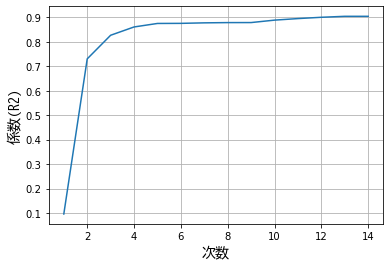

In [243]:
def score(j: int) -> float:
    # パラメータ推定（j次関数）
    fit = np.polyfit(x, y, j)
    # 予測値
    y2 = np.poly1d(fit)(x)
    # 最小二乗スコア判定
    return r2_score(y, y2)


# グラフ作成
fig, ax = plt.subplots()
ji = range(1, 15)
y0 = list(map(score, ji))
ax.plot(ji, y0)

# グラフのラベル等を設定
ax.set_xlabel("次数", fontproperties=JP)
ax.set_ylabel("係数(R2)", fontproperties=JP)
ax.grid(True)
plt.show()
